# Reviews Classification for the Amazon Product - Boat BassHeads 100
The reviews used here were scraped using the code available at https://github.com/mrinal069/Amazon-Reviews-Scraping-and-Classification/blob/main/Amazon_Reviews_Scraper.ipynb.

In [ ]:
import numpy as np
import pandas as pd

### Loading the data

In [ ]:
df = pd.read_csv('Reviews.csv')

In [ ]:
df

,Name,Ratings,Header,Date,Product_Details,Review,Helpful
0,Amazon Customer,4,Good for One Year,7 October 2022,Colour: BlackStyle name: 2020,"Able to use exactly One year after that, only ...",2 people found this helpful
1,Ankit Bisht,4,Better than expected,8 October 2022,Colour: BlackStyle name: 2020,It's been 2 month since I bought these earphon...,One person found this helpful
2,AMIR ANSARI,4,Product packaging is too old.,6 October 2022,Colour: BlackStyle name: 2020,As per online pic model is changed. It is Refu...,NaN
3,Pratyush Sharma,4,Issue with comfort,14 September 2022,Colour: BlackStyle name: 2020,I'll say product is fine 🙂 and all.I been usin...,4 people found this helpful
4,Arsalan A.,4,Superb quality earphone,8 October 2022,Colour: Furious RedStyle name: 2020,Noise cancellation is not that good but overal...,NaN
...,...,...,...,...,...,...,...
4995,Aakriti Jain,2,Received damaged product,13 April 2022,Colour: BlackStyle name: 2020,Received used headphones even after replacemen...,NaN
4996,Mithilesh,5,"Good build quality, sound quality and enduranc...",20 December 2020,Colour: BlackStyle name: 2020,For the price range it is an Excellent product...,NaN
4997,Pankaj Bawdekar,5,Better product at low price rate,11 July 2021,Colour: BlackStyle name: 2020,If your only purpose is to listen songs then i...,NaN
4998,prashant varadkar,4,Compare to price it worth,22 July 2021,Colour: Courageous OrangeStyle name: Made in I...,Sound quality good,NaN


## Basic data cleaning and preprocessing

In [ ]:
# dropping useless rows
df.drop(columns=['Name', 'Date', 'Product_Details', 'Helpful'], inplace=True)

In [ ]:
df

,Ratings,Header,Review
0,4,Good for One Year,"Able to use exactly One year after that, only ..."
1,4,Better than expected,It's been 2 month since I bought these earphon...
2,4,Product packaging is too old.,As per online pic model is changed. It is Refu...
3,4,Issue with comfort,I'll say product is fine 🙂 and all.I been usin...
4,4,Superb quality earphone,Noise cancellation is not that good but overal...
...,...,...,...
4995,2,Received damaged product,Received used headphones even after replacemen...
4996,5,"Good build quality, sound quality and enduranc...",For the price range it is an Excellent product...
4997,5,Better product at low price rate,If your only purpose is to listen songs then i...
4998,4,Compare to price it worth,Sound quality good


In [ ]:
# merging header and review for full review
df['Full_Review'] = df['Header'] + '. '+ df['Review']

In [ ]:
df.drop(columns=['Header', 'Review'], inplace=True)

In [ ]:
df.sample(10)

,Ratings,Full_Review
4946,5,Great product at great price. If purely sound ...
712,4,Overall good product. Quality and plastic can ...
4761,5,Happy. Awesome product from boat
745,3,Better than other brands but wire is thinner.....
2874,1,"Not good product, after 15 days its stopped wo..."
1226,3,Not happy by product. with in 40 days one righ...
944,4,Average performance. unable to hear good sound...
2444,3,Wont last more than 6 months. Bought it last y...
1300,5,Overall nice. Nice one
4242,4,Value for the money. Cool product...Good quali...


### Converting Ratings to Positive and Negative
Here, we have chosen to include 4 and 5 stars as Positive, 1, 2 and 3 stars as Negative. 

In [ ]:
# binning ratings to posituve and negative
bins = [0, 3, np.inf]
names = [0, 1]

df['Ratings'] = pd.cut(df['Ratings'], bins, labels=names)

In [ ]:
df

,Ratings,Full_Review
0,1,Good for One Year. Able to use exactly One yea...
1,1,Better than expected. It's been 2 month since ...
2,1,Product packaging is too old.. As per online p...
3,1,Issue with comfort. I'll say product is fine 🙂...
4,1,Superb quality earphone. Noise cancellation is...
...,...,...
4995,0,Received damaged product. Received used headph...
4996,1,"Good build quality, sound quality and enduranc..."
4997,1,Better product at low price rate. If your only...
4998,1,Compare to price it worth. Sound quality good


### Dropping NaN reviews

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(4741, 2)

### Dropping Duplicates

In [ ]:
df.duplicated().sum()

239

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(4502, 2)

## Undersampling 
To deal with the problem of Class Imbalance - Random DownSampler

In [ ]:
df.Ratings.value_counts()

1    3543
0     959
Name: Ratings, dtype: int64

In [ ]:
neg_df = df[df.Ratings == 0]
pos_df = df[df.Ratings == 1]

In [ ]:
# sampling positive rows equal to no of negative rows
pos_sample_df = pos_df.sample(neg_df.shape[0], random_state=34)

In [ ]:
pos_sample_df

,Ratings,Full_Review
10,1,Ok budget headphone. Noise cancellation and mi...
2965,1,Unexpected!! Overwhelmed with boAt BassHeads 1...
4295,1,Sound quality good. No
1371,1,Good. Bass would have been better
2886,1,Good product and inexpensive. Let's cover the ...
...,...,...
3740,1,Replace my earphone. I want to replace my earp...
4849,1,"Good for music, average for gaming. I liked th..."
3798,1,Good bass. I like this one. Good bass and stan...
2971,1,Best price according to quality. According to ...


In [ ]:
# concatenating the dataframes
df = pd.concat([pos_sample_df, neg_df], axis=0)
# shuffling the rows of the balanced dataframe
df = df.sample(frac=1, random_state=34)
df

,Ratings,Full_Review
4054,0,Worst. One of my worst thing I have purchased ...
2730,0,Good one.. in this price range. Good one... Va...
3086,1,Good earphones only issue with speaker. Good e...
2919,1,Very good. Sound quality is very goodPerforman...
605,0,No durability. Durability is very low shortly ...
...,...,...
4303,0,Boat. Bass quality not good
4887,0,"Basic starting range earphone ,average sound ..."
152,1,Good ⛵. This is good product of ⛵.
1449,0,Product replacement. Problem with remote. My e...


In [ ]:
# chceking for balance in the dataset
df.Ratings.value_counts()

0    959
1    959
Name: Ratings, dtype: int64

## Text Data Preprocessing

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import contractions

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def basic_cleaning(text):
    # convert to lower case
    text = text.lower()   
    # removing period and replacing with space
    text = re.sub('\.', ' ', text) 
    # removing all the punctuations using string module but not newline characters
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # removing all words that have digits in them
    text = re.sub('\w*\d\w*', '', text)
    # removing all newline characters
    text = re.sub('\n', '', text)
    # only allowing a to z and A to Z
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text

def advanced_cleaning(text):
    # expands contracted words
    text = contractions.fix(text)
    # removing the english stopwords
    stop = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop])
    # doing lemmatization
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    # removing extra spaces
    text = re.sub(' +', ' ', text)
    return text

In [ ]:
df['Full_Review']

4054    Worst. One of my worst thing I have purchased ...
2730    Good one.. in this price range. Good one... Va...
3086    Good earphones only issue with speaker. Good e...
2919    Very good. Sound quality is very goodPerforman...
605     No durability. Durability is very low shortly ...
                              ...                        
4303                          Boat. Bass quality not good
4887    Basic starting range  earphone ,average sound ...
152                    Good ⛵. This is good product of ⛵.
1449    Product replacement. Problem with remote. My e...
2830    poor sound. very poor sound quality, zero nois...
Name: Full_Review, Length: 1918, dtype: object

In [ ]:
df['Full_Review'] = df['Full_Review'].apply(basic_cleaning)
df['Full_Review'] = df['Full_Review'].apply(advanced_cleaning)

In [ ]:
df['Full_Review']

4054    worst one worst thing purchased one side earph...
2730            good one price range good one value money
3086    good earphone issue speaker good earphone issu...
2919              good sound quality goodperformance good
605     durability durability low shortly working got ...
                              ...                        
4303                               boat bass quality good
4887    basic starting range earphone average sound qu...
152                                     good good product
1449    product replacement problem remote earphone re...
2830    poor sound poor sound quality zero noise cance...
Name: Full_Review, Length: 1918, dtype: object

In [ ]:
df.isna().sum()

Ratings        0
Full_Review    0
dtype: int64

## Word Embeddings
Using CountVectorizer to embed the words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(df["Full_Review"])
X

<1918x3500 sparse matrix of type '<class 'numpy.int64'>'
	with 24913 stored elements in Compressed Sparse Row format>

In [ ]:
vec.get_feature_names_out()

array(['aa', 'aacha', 'aaj', ..., 'zebronics', 'zero', 'zoom'],
      dtype=object)

In [ ]:
X = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
X

,aa,aacha,aaj,aati,aawaj,ab,abhi,abi,abilitiesnot,able,...,youtuber,yr,ysplitter,yt,yuk,yyes,zebronic,zebronics,zero,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df['Ratings']
y

4054    0
2730    0
3086    1
2919    1
605     0
       ..
4303    0
4887    0
152     1
1449    0
2830    0
Name: Ratings, Length: 1918, dtype: category
Categories (2, int64): [0 < 1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=5, test_size=0.2)

In [ ]:
print('Shape of Train data : ', X_train.shape)
print('Shape of Test data : ', X_test.shape)

Shape of Train data :  (1534, 3500)
Shape of Test data :  (384, 3500)


## Modelling
We will be trying out various classification models, and find that works best for us.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def my_classification_report(p_train, p_test, y_train, y_test):
    print('Training : \n', classification_report(y_train, p_train))
    print('\nTesting : \n', classification_report(y_test, p_test))

### 1. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
y_pred = clf.predict(X_test)
y_pred.shape

(384,)

In [ ]:
my_classification_report(clf.predict(X_train), y_pred, y_train, y_test)

Training : 
               precision    recall  f1-score   support

           0       0.96      0.77      0.85       762
           1       0.81      0.97      0.88       772

    accuracy                           0.87      1534
   macro avg       0.88      0.87      0.87      1534
weighted avg       0.88      0.87      0.87      1534


Testing : 
               precision    recall  f1-score   support

           0       0.63      0.45      0.53       197
           1       0.55      0.72      0.62       187

    accuracy                           0.58       384
   macro avg       0.59      0.58      0.57       384
weighted avg       0.59      0.58      0.57       384



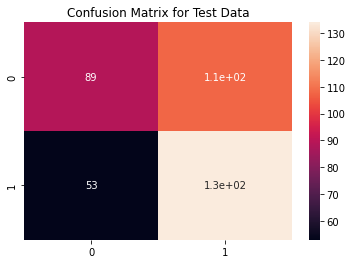

In [ ]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Test Data")
plt.show()

### 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)
y_pred.shape

(384,)

In [ ]:
my_classification_report(clf.predict(X_train), y_pred, y_train, y_test)

Training : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       762
           1       0.90      0.94      0.92       772

    accuracy                           0.92      1534
   macro avg       0.92      0.92      0.92      1534
weighted avg       0.92      0.92      0.92      1534


Testing : 
               precision    recall  f1-score   support

           0       0.77      0.76      0.76       197
           1       0.75      0.76      0.76       187

    accuracy                           0.76       384
   macro avg       0.76      0.76      0.76       384
weighted avg       0.76      0.76      0.76       384



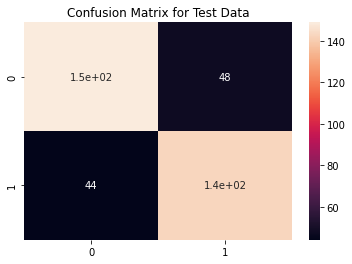

In [ ]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Test Data")
plt.show()

### 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_pred = clf.predict(X_test)
y_pred.shape

(384,)

In [ ]:
my_classification_report(clf.predict(X_train), y_pred, y_train, y_test)

Training : 
               precision    recall  f1-score   support

           0       0.76      0.65      0.70       762
           1       0.70      0.80      0.75       772

    accuracy                           0.73      1534
   macro avg       0.73      0.73      0.72      1534
weighted avg       0.73      0.73      0.72      1534


Testing : 
               precision    recall  f1-score   support

           0       0.77      0.63      0.70       197
           1       0.68      0.80      0.73       187

    accuracy                           0.72       384
   macro avg       0.72      0.72      0.71       384
weighted avg       0.72      0.72      0.71       384



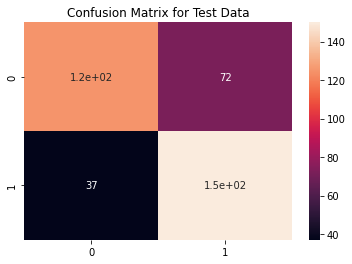

In [ ]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Test Data")
plt.show()

### 4. K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(10)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = clf.predict(X_test)
y_pred.shape

(384,)

In [ ]:
my_classification_report(clf.predict(X_train), y_pred, y_train, y_test)

Training : 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       762
           1       0.74      0.79      0.77       772

    accuracy                           0.76      1534
   macro avg       0.76      0.76      0.76      1534
weighted avg       0.76      0.76      0.76      1534


Testing : 
               precision    recall  f1-score   support

           0       0.67      0.62      0.65       197
           1       0.63      0.68      0.66       187

    accuracy                           0.65       384
   macro avg       0.65      0.65      0.65       384
weighted avg       0.65      0.65      0.65       384



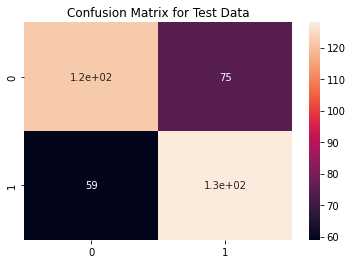

In [ ]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Test Data")
plt.show()

### 5. Support Vector Machines

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(class_weight='balanced')
clf.fit(X_train, y_train)

SVC(class_weight='balanced')

In [ ]:
y_pred = clf.predict(X_test)
y_pred.shape

(384,)

In [ ]:
my_classification_report(clf.predict(X_train), y_pred, y_train, y_test)

Training : 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       762
           1       0.88      0.92      0.90       772

    accuracy                           0.89      1534
   macro avg       0.89      0.89      0.89      1534
weighted avg       0.89      0.89      0.89      1534


Testing : 
               precision    recall  f1-score   support

           0       0.73      0.78      0.75       197
           1       0.75      0.70      0.72       187

    accuracy                           0.74       384
   macro avg       0.74      0.74      0.74       384
weighted avg       0.74      0.74      0.74       384



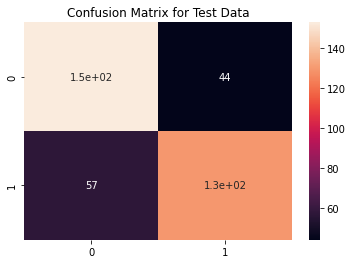

In [ ]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Test Data")
plt.show()

### 6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=6)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [ ]:
y_pred = clf.predict(X_test)
y_pred.shape

(384,)

In [ ]:
my_classification_report(clf.predict(X_train), y_pred, y_train, y_test)

Training : 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       762
           1       0.81      0.84      0.83       772

    accuracy                           0.82      1534
   macro avg       0.82      0.82      0.82      1534
weighted avg       0.82      0.82      0.82      1534


Testing : 
               precision    recall  f1-score   support

           0       0.76      0.71      0.73       197
           1       0.71      0.76      0.74       187

    accuracy                           0.73       384
   macro avg       0.74      0.74      0.73       384
weighted avg       0.74      0.73      0.73       384



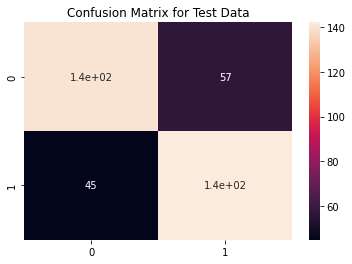

In [ ]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Test Data")
plt.show()

In our case, Logistic Regression, SVM and Random Forest performs well enough with testing accuracies of 76 %.

# The End